In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



 Load data


In [36]:
df = pd.read_csv("drug_deaths.csv")



In [37]:
df.head()

,Unnamed: 0,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,...,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo
0,0,14-0273,06/28/2014 12:00:00 AM,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,NaN,0,0,Accident,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)"
1,1,13-0102,03/21/2013 12:00:00 AM,0.0,48.0,Male,Black,NORWALK,NaN,NaN,...,0,0,0,NaN,0,0,Accident,"Norwalk, CT\n(41.11805, -73.412906)","NORWALK, CT\n(41.11805, -73.412906)","CT\n(41.575155, -72.738288)"
2,2,16-0165,03/13/2016 12:00:00 AM,0.0,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,...,0,0,0,NaN,0,1,Accident,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)",NaN
3,3,16-0208,03/31/2016 12:00:00 AM,0.0,23.0,Male,White,RYE,WESTCHESTER,NY,...,0,0,0,NaN,0,1,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,NaN
4,4,13-0052,02/13/2013 12:00:00 AM,0.0,22.0,Male,"Asian, Other",FLUSHING,QUEENS,NaN,...,0,0,0,NaN,0,0,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,"CT\n(41.575155, -72.738288)"


In [38]:
df.describe()

,Unnamed: 0,DateType,Age,Heroin,Cocaine,Fentanyl_Analogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Hydromorphone,OpiateNOS
count,5105.000000,5103.000000,5102.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000
mean,2552.000000,0.446992,41.964916,0.495397,0.297943,0.076200,0.118903,0.021156,0.244270,0.023115,0.263075,0.092850,0.031146,0.025465,0.004897,0.017238
std,1473.830893,0.497231,12.336639,0.500028,0.457399,0.265344,0.323706,0.143917,0.429696,0.150282,0.440346,0.290251,0.173729,0.157549,0.069815,0.130170
min,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1276.000000,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2552.000000,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3828.000000,1.000000,52.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5104.000000,1.000000,87.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5105 entries, 0 to 5104
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           5105 non-null   int64  
 1   ID                   5105 non-null   object 
 2   Date                 5103 non-null   object 
 3   DateType             5103 non-null   float64
 4   Age                  5102 non-null   float64
 5   Sex                  5099 non-null   object 
 6   Race                 5092 non-null   object 
 7   ResidenceCity        4932 non-null   object 
 8   ResidenceCounty      4308 non-null   object 
 9   ResidenceState       3556 non-null   object 
 10  DeathCity            5100 non-null   object 
 11  DeathCounty          4005 non-null   object 
 12  Location             5081 non-null   object 
 13  LocationifOther      590 non-null    object 
 14  DescriptionofInjury  4325 non-null   object 
 15  InjuryPlace          5039 non-null   o

Clean data

In [40]:
columns_to_keep = ["Age", "Sex", "Race", "ResidenceState", "Date", "Heroin", "Cocaine", "Fentanyl", "Fentanyl_Analogue",
                   "Oxycodone", "Oxymorphone", "Ethanol", "Hydrocodone", "Benzodiazepine", "Methadone", "Amphet",
                   "Tramad", "Morphine_NotHeroin", "Hydromorphone", "OpiateNOS", "AnyOpioid"]
df_cleaned = df[columns_to_keep].dropna()


Convert Age to numeric and handle errors


In [41]:
df_cleaned["Age"] = pd.to_numeric(df_cleaned["Age"], errors='coerce')
df_cleaned = df_cleaned.dropna(subset=["Age"])  # Remove invalid age values



Convert drug-related columns to numeric, filling NaN with 0


In [42]:
drug_columns = ["Heroin", "Cocaine", "Fentanyl", "Fentanyl_Analogue", "Oxycodone", "Oxymorphone", "Ethanol",
                "Hydrocodone", "Benzodiazepine", "Methadone", "Amphet", "Tramad", "Morphine_NotHeroin",
                "Hydromorphone", "OpiateNOS", "AnyOpioid"]
df_cleaned[drug_columns] = df_cleaned[drug_columns].apply(pd.to_numeric, errors="coerce").fillna(0)


Age distribution analysis


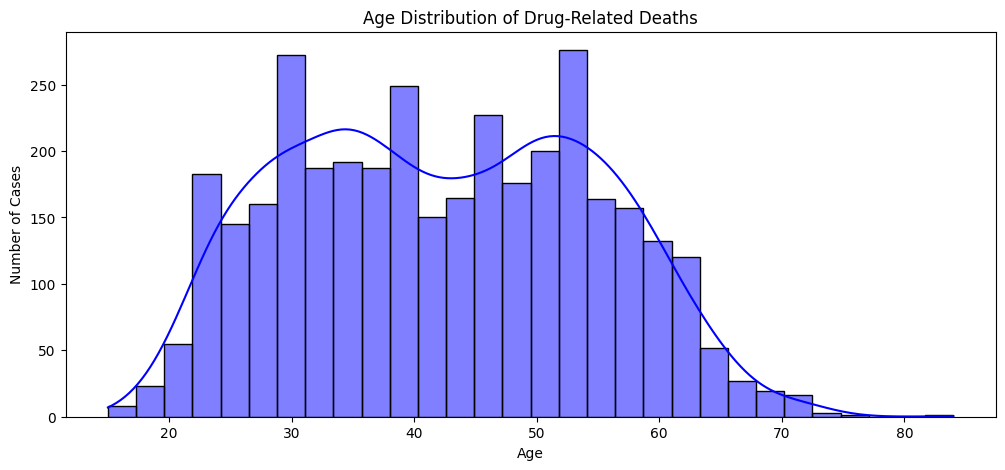

In [43]:
plt.figure(figsize=(12, 5))
sns.histplot(df_cleaned["Age"], bins=30, kde=True, color="blue")
plt.title("Age Distribution of Drug-Related Deaths")
plt.xlabel("Age")
plt.ylabel("Number of Cases")
plt.show()



Gender distribution


<ipython-input-44-84e40e238044>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sex", data=df_cleaned, palette="coolwarm")


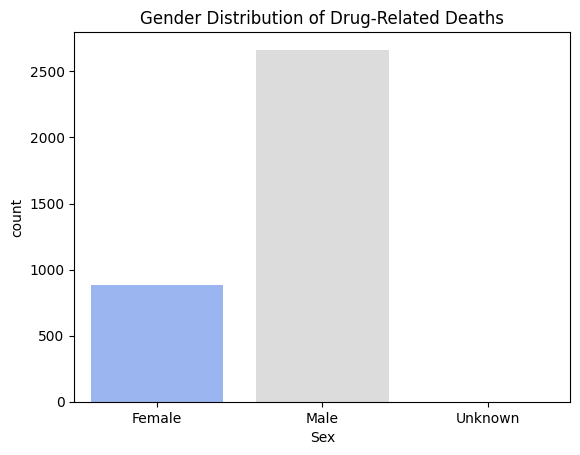

In [44]:
sns.countplot(x="Sex", data=df_cleaned, palette="coolwarm")
plt.title("Gender Distribution of Drug-Related Deaths")
plt.show()





 Race distribution


<ipython-input-45-b09856c00c34>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Race", data=df_cleaned, palette="viridis", order=df_cleaned["Race"].value_counts().index)


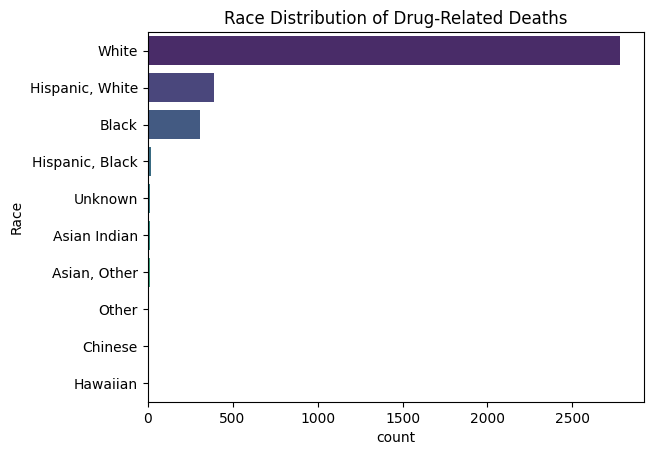

In [45]:
sns.countplot(y="Race", data=df_cleaned, palette="viridis", order=df_cleaned["Race"].value_counts().index)
plt.title("Race Distribution of Drug-Related Deaths")
plt.show()




Analysis of most common drugs


<ipython-input-46-5e2919186ce4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=drug_deaths.values, y=drug_deaths.index, palette="magma")


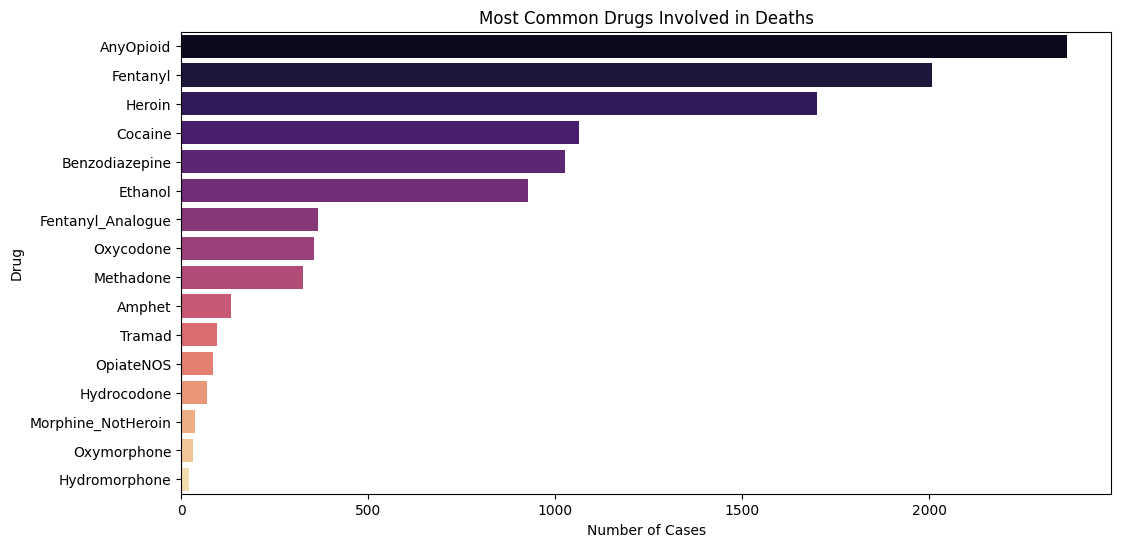

In [46]:

drug_deaths = df_cleaned[drug_columns].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=drug_deaths.values, y=drug_deaths.index, palette="magma")
plt.title("Most Common Drugs Involved in Deaths")
plt.xlabel("Number of Cases")
plt.ylabel("Drug")
plt.show()



 Drug use by gender


In [47]:
if df_cleaned["Sex"].nunique() <= 2:  # Expecting Male/Female
    drug_gender = df_cleaned.groupby("Sex")[drug_columns].sum().T
    drug_gender.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="coolwarm")
    plt.title("Drug Use by Gender")
    plt.xlabel("Drug")
    plt.ylabel("Number of Cases")
    plt.xticks(rotation=90)
    plt.legend(title="Gender")
    plt.show()
else:
    print("Unexpected values in 'Sex' column. Skipping gender plot.")


Unexpected values in 'Sex' column. Skipping gender plot.



 Death distribution by state


<ipython-input-48-1313319caee9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_deaths.values, y=state_deaths.index, palette="Blues_r")


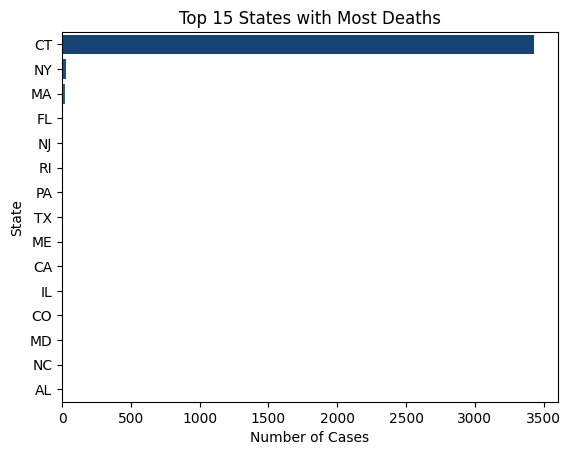

In [48]:
state_deaths = df_cleaned["ResidenceState"].value_counts().head(15)
sns.barplot(x=state_deaths.values, y=state_deaths.index, palette="Blues_r")
plt.title("Top 15 States with Most Deaths")
plt.xlabel("Number of Cases")
plt.ylabel("State")
plt.show()



 Correlation between age and drug use


<ipython-input-49-1dd6056150ef>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=drug_age_corr.index, y=drug_age_corr.values, palette="coolwarm")


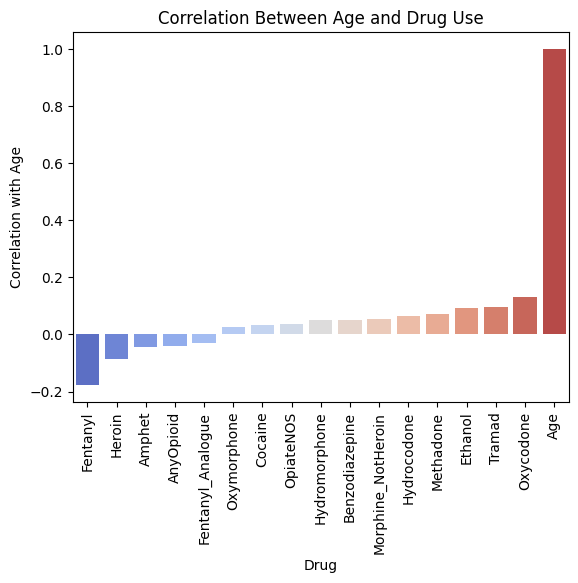

In [49]:
drug_age_corr = df_cleaned[["Age"] + drug_columns].corr()["Age"].dropna().sort_values()
sns.barplot(x=drug_age_corr.index, y=drug_age_corr.values, palette="coolwarm")
plt.title("Correlation Between Age and Drug Use")
plt.xlabel("Drug")
plt.ylabel("Correlation with Age")
plt.xticks(rotation=90)
plt.show()



 Temporal analysis of deaths


<ipython-input-50-c560ada5da05>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned["DeathDate"] = pd.to_datetime(df_cleaned["Date"], errors="coerce")


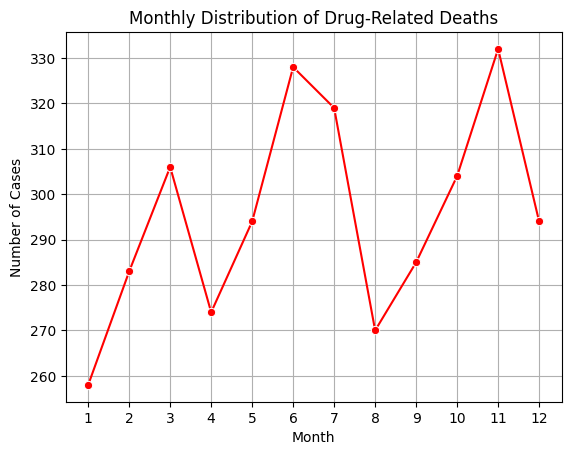

In [50]:
df_cleaned["DeathDate"] = pd.to_datetime(df_cleaned["Date"], errors="coerce")
df_cleaned["DeathMonth"] = df_cleaned["DeathDate"].dt.month
monthly_deaths = df_cleaned["DeathMonth"].value_counts().sort_index()
sns.lineplot(x=monthly_deaths.index, y=monthly_deaths.values, marker="o", color="red")
plt.xticks(range(1, 13))
plt.title("Monthly Distribution of Drug-Related Deaths")
plt.xlabel("Month")
plt.ylabel("Number of Cases")
plt.grid(True)
plt.show()